# Tensorflow

When starting off with deep learning, one of the first questions to ask is, which framework to learn?

Common choices include Theano, TensorFlow, Torch, and Keras. All of these choices have their own pros and cons and have their own way of doing things.

> From [**The Anatomy of Deep Learning Frameworks**](https://medium.com/@gokul_uf/the-anatomy-of-deep-learning-frameworks-46e2a7af5e47#.3ywhrk1st)

> The core components of a deep learning framework we must consider are:

> + How Tensor Objects are defined. At the heart of the framework is the tensor object. A tensor is a generalization of a matrix to n-dimensions. We need a Tensor Object that supports storing the data in form of tensors. Not just that, we would like the object to be able to convert other data types (images, text, video) into tensors and back, supporting indexing, overloading operators, having a space efficient way to store the data and so on.
+ How Operations on the Tensor Object are defined. A neural network can be considered as a series of Operations performed on an input tensor to give an output. 
+ The use of a Computation Graph and its Optimizations. Instead of implementing operations as functions, they are usually implemented as **classes**. This allows us to store more information about the operation like calculated shape of the output (useful for sanity checks), how to compute the gradient or the gradient itself (for the auto-differentiation), have ways to be able to decide whether to compute the op on GPU or CPU and so on. The power of neural networks lies in the ability to chain multiple operations to form a powerful approximator. Therefore, the standard use case is that you can initialize a tensor, perform actions after actions on them and finally interpret the resulting tensor as labels or real values. Unfortunately, as you chain more and more operations together, several issues arise that can drastically slow down your code and introduce bugs as well. There are more such issues and it becomes necessary to be able to get a bigger picture to even notice that these issues exist. We need a way to optimize the resultant chain of operations for both space and time. A Computation Graph which is basically an object that contains links to the instances of various Ops and the relations between which operation takes the output of which operation as well as additional information. 
+ The use of Auto-differentiation tools. Another benefit of having the computational graph is that calculating gradients used in the learning phase becomes modular and straightforward to compute. 
+ The use of BLAS/cuBLAS and cuDNN extensions for maximizing performance. BLAS or Basic Linear Algebra Subprograms are a collection of optimized matrix operations, initially written in Fortran. These can be leveraged to do very fast matrix (tensor) operations and can provide significant speedups. There are many other software packages like Intel MKL, ATLAS which also perform similar functions. BLAS packages are usually optimized assuming that the instructions will be run on a CPU. In the deep learning situation, this is not the case and BLAS may not be able to fully exploit the parallelism offered by GPGPUs. To solve this issue, NVIDIA has released cuBLAS which is optimized for GPUs. This is now included with the CUDA toolkit.



The computational model for Tensorflow (`tf`) is a **directed graph**.

**Nodes** are *functions* (*operations* in `tf` terminology) and **edges** are *tensors*. 

**Tensor** are multidimensional data arrays. 

$$f(a,b) = (a*b) + (a+b)$$

![alt text](images/t1.png)

There are several reasons for this design:
+ The most important is that is a good way to split up computation into small, **easily differentiable** pieces. `tf` uses automatic differentiation to automatically compute the derivative of every node with respect any other node that can affect the first node's output.
+ The grah is also a convenient way for distributing computation across multiple CPUs, GPUs, etc.

The primary API of `tf` (written in C++) is accessed through Python.


There are different way of installing `tf`:

+ Pip install: May impact existing Python programs on your machine.
+ Virtualenv install: Install TensorFlow in its own directory, not impacting any existing Python programs on your machine.
+ Anaconda install (Windows: only Python 3, not Python 2.7): Install TensorFlow in its own environment for those running the Anaconda Python distribution. Does not impact existing Python programs on your machine.
+ Docker install: Run TensorFlow in a Docker container isolated from all other programs on your machine. It allows coexisting ``tf`` versions.
+ Installing from sources: Install TensorFlow by building a pip wheel that you then install using pip.

Our preferred way is Docker install.

## Fundamentals

`tf` computation graphs are described in code with `tf` API.

In [2]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [3]:
# Basic constant operations = to assign a value to a tensor
a = tf.constant(2)
b = tf.constant(3)
c = a+b 
d = a*b
e = c+d

# non interactive session

with tf.Session() as sess:
    print("a=2")
    print("b=3")
    print("(a+b)+(a*b) = %i" % sess.run(e))

a=2
b=3
(a+b)+(a*b) = 11


You can create initialized tensors in many ways:

In [4]:
a = tf.zeros([2,3], tf.int32)
b = tf.ones([2,3], tf.int32)
c = tf.fill([3,3], 23.9)
d = tf.range(0,10,1)

with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(b))
    print(sess.run(c))
    print(sess.run(d))

[[0 0 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]]
[[ 23.89999962  23.89999962  23.89999962]
 [ 23.89999962  23.89999962  23.89999962]
 [ 23.89999962  23.89999962  23.89999962]]
[0 1 2 3 4 5 6 7 8 9]


``tf`` sequences are not iterable!

We can also generate random variables:

In [5]:
a = tf.random_normal([2,2], 0.0, 1.0)
b = tf.random_uniform([2,2], 0.0, 1.0)

with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(b))

[[ 0.44119048 -0.24833009]
 [ 0.93406135  0.38558838]]
[[ 0.34734356  0.64993799]
 [ 0.74053848  0.3835789 ]]


In [6]:
# Basic operations with variable graph input

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
c = tf.add(a,b) 
d = tf.mul(a,b)
e = tf.add(c,d)

values = feed_dict={a: 5, b: 3}

# non interactive session

with tf.Session() as sess:
    print('a = %i' % sess.run(a, values))
    print('b = %i' % sess.run(b, values))
    print("(a+b)+(a*b) = %i" % sess.run(e, values))

a = 5
b = 3
(a+b)+(a*b) = 23


A computational graph is a series of functions chained together, each passing its output to zero, one or more functions further along the chain.

In this way we can construct very complex transformations on data by using a library of simple functions.

Nodes represent some sort of computation beign done in the graph context.

Edges are the actual values (tensors) that get passed to and from nodes.

![alt text](images/t2.png)

+ The values flowing into the graph can come from different sources: from a different graph, from a file, entered by the client, etc. The *input* nodes simply pass on values given to them.
+ The other nodes take values, apply an operation and output their result. 

Values running on edges are tensors:

In [7]:
# Basic operations with variable as graph input

a = tf.placeholder(tf.int16,shape=[2])
b = tf.placeholder(tf.int16,shape=[2])
c = tf.add(a,b) 
d = tf.mul(a,b)
e = tf.add(c,d)

variables = feed_dict={a: [2,2], b: [3,3]}

# non interactive session

with tf.Session() as sess:
    print(sess.run(a, variables))
    print(sess.run(b, variables))
    print(sess.run(e, variables))

[2 2]
[3 3]
[11 11]


### Exercise

Implement this computational graph:

![alt text](images/t3.png)


In [8]:
# your code here


There are certein connections between nodes that are not allowed: you cannot create **circular dependencies**.

> Dependency: Any node A that is required for the computation of a later node B is said to be a **dependency** of B.

The main reason is that dependencies create endless feedback loops.

As we have seen in previous code, `tf` workflow is a two-step process:

+ Define the computation graph.
+ Run the graph with data.

In [9]:
# graph definition
# we can assign a name to every node

a = tf.placeholder(tf.int32, name='input_a')
b = tf.placeholder(tf.int32, name='input_b')
c = tf.add(a,b,name='add_1') 
d = tf.mul(a,b,name='mul_1')
e = tf.add(c,d,name='add_2')

values = feed_dict={a: 5, b: 3}

# now we can run the graph in an interactive session

sess = tf.Session()
print(sess.run(e, values))
sess.close()

23


### 'tf' Neural Network from scratch

Let's classify handwritten digits:

![alt text](images/mnistExamples.png)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


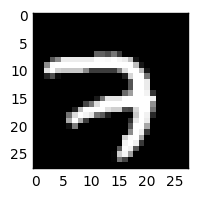

Class:  7


In [10]:
# Import MINST data
# The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 
# 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation).

# Both the training set and test set contain images and their corresponding labels; for example the 
# training images are mnist.train.images and the training labels are mnist.train.labels.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

mnist = input_data.read_data_sets("data/", one_hot=True)

fig, ax = plt.subplots(figsize=(2, 2))
plt.imshow(mnist.train.images[0].reshape((28, 28)), interpolation='nearest', cmap='gray')
plt.show()

print "Class: ", np.argmax(mnist.train.labels[0])

In [11]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input    = 784 # MNIST data input (img shape: 28*28)
n_classes  = 10  # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [12]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [13]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [14]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost)
    
    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 181.690271507
Epoch: 0002 cost= 43.488888639
Epoch: 0003 cost= 27.607334595
Epoch: 0004 cost= 19.203663949
Epoch: 0005 cost= 13.861255352
Epoch: 0006 cost= 10.229365169
Epoch: 0007 cost= 7.770155947
Epoch: 0008 cost= 5.727235521
Epoch: 0009 cost= 4.395976887
Epoch: 0010 cost= 3.147087345
Epoch: 0011 cost= 2.369394934
Epoch: 0012 cost= 1.824500813
Epoch: 0013 cost= 1.259563117
Epoch: 0014 cost= 0.972446834
Epoch: 0015 cost= 0.813072834
Optimization Finished!
Accuracy: 0.9439
